# Customer Review Sentiment Analysis and Prediction

![Sign Language](https://i0.wp.com/thedatascientist.com/wp-content/uploads/2018/10/sentiment_analysis.jpg?fit=1600%2C780&ssl=1)

An online store wants to find out how customers feel about the products they sell without using the rating alone (since not all customers rate the product) and also be able to have a real-time prediction of the how people feel about their products. This would help the business to identify how to improve the business. 
To do this the review of the products with how people feel about the products (sentiments) were gathered. The data can be found [here](https://www.kaggle.com/datasets/datamunge/sign-language-mnist).

Finding out how customers feel about the product will involve analysisng the current data and retrieving the sentiment ratio of the data. To be able to predict in real-time the sentiment of the reviews of cutomers, a model will be created to make these predictions. 

### Importing the relevant libraries

In [1]:
# importing libraries
import pandas as pd    # for data importing and manipulation
import numpy as np    # for data array and matrix manipulation

# for plotting data
import matplotlib.pyplot as plt   
import seaborn as sns

from wordcloud import WordCloud    # for visualizing the text in a wordcloud

import time    # to time how long the code takes to run
import random         # for random selection of the data

from collections import Counter

# for text/string manipulation
import re
import string
import nltk
from nltk.corpus import stopwords
import warnings 


# from nltk.corpus import wordnet as wn

# for converting text columns into text matrix
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder # for encoding the target variable

from imblearn.over_sampling import SMOTE, ADASYN        # for data balancing

from sklearn.model_selection import train_test_split    # for splitting the data into train and test set
from sklearn.model_selection import GridSearchCV        # for hyperparameter tuning
from sklearn.metrics import make_scorer                 # for converting a function into a scoring method in Gridsearch

# for model evaluations
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score

# models to be trained and evaluated
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

## Reading and Inspecting the data


#### Reading the csv file
The file containing the data is a comma seperated val file. The Pandas library has a function that can be used to import files of different formats including .csv files

In [2]:
# importing the dataset using pandas' .read_csv
df = pd.read_csv("Dataset-SA.csv")

# displaying the first five rows of the data
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


## Data Exploration

In [3]:
# printing the shape of the data
df.shape

(205052, 6)

#### The dataset contains 205,052 rows.
This is to ensure that training is fast __only 5000 rows of the data will be randomly selected.__

In [4]:
# Set a random seed for reproducibility
random.seed(42)

# Randomly select 5000 rows from the dataframe
df = df.sample(n=5000)

## Inspecting the data

In [5]:
# printing the information of the data attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 28418 to 51809
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   5000 non-null   object
 1   product_price  5000 non-null   object
 2   Rate           5000 non-null   object
 3   Review         4386 non-null   object
 4   Summary        5000 non-null   object
 5   Sentiment      5000 non-null   object
dtypes: object(6)
memory usage: 273.4+ KB


In [6]:
# printing the description of the data
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,5000,5000,5000,4386,5000,5000
unique,718,430,5,94,2932,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,175,254,2867,229,478,4061


An overview of the data shows that out of the 5000 entries in the dataset, there are 2 missing values in the __Summary__ column and 612 missing values in the __Review__ column. These values will be dropped from the rows.

### Dropping the null values

In [7]:
# dropping the null values in the summary column
df.dropna(inplace = True)

_________________________________________________________________________________________________________________________

### Data Analysis

One of the tasks is to know how well the product perform on the market by finding the sentiments of the product reviews. To get a good sense of this, it would be easier to plot the sentiments of the reviews on a bar chart.

Number of each class:


positive    3568
negative     597
neutral      221
Name: Sentiment, dtype: int64

Percentage of the positive sentiment class: 81.35 %
Percentage of the negative sentiment class: 13.61 %
Percentage of the neutral sentiment class: 5.04 %


<AxesSubplot:>

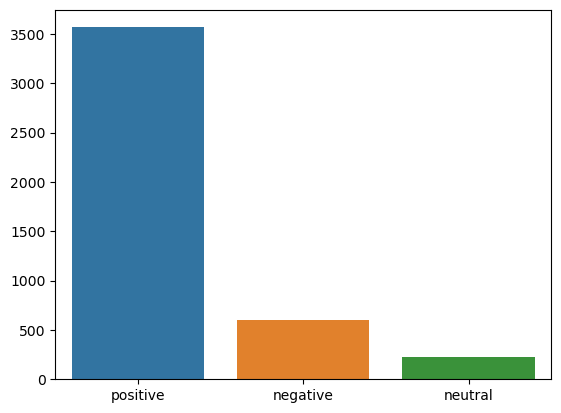

In [8]:
# finding the different classes of sentiments of the data
sent_count = df['Sentiment'].value_counts()
print('Number of each class:')
display(sent_count)

# calculating the ratio of the three different sentiments in the data
print('Percentage of the positive sentiment class:', 100 * round(sent_count['positive']/(sent_count['neutral'] + sent_count['negative'] + sent_count['positive']), 4), '%')
print('Percentage of the negative sentiment class:', 100 * round(sent_count['negative']/(sent_count['neutral'] + sent_count['negative'] + sent_count['positive']), 4), '%')
print('Percentage of the neutral sentiment class:', 100 * round(sent_count['neutral']/(sent_count['neutral'] + sent_count['negative'] + sent_count['positive']), 4), '%')

# plotting the sentiments of the data
sns.barplot(x=sent_count.index, y=sent_count.values)

Findings from this analysis shows that the positive sentiments has the majority number and accounts for 80.45% of all the reviews recieved. The neural class accounts for the least number of reviews. 

_________________________________________________________________________________________________________________________

## Model Development

The second part of the task is to create a model that predicts the sentiment of the reviews of customers in real-time. To do this a couple of step has to be performed. 

1. Cleaning and preprocessing of the data
2. Splitting the data into train, test and validation set
3. Converting text into numerical feature vectors
4. Balancing the data
5. Model training
6. Hyperparameter tuning

### Text Preprocessing and Cleaning

To analyse text data, the data has to be preprocessed and cleaned. This will invlove a number of steps
1. Converting the text into lower case so that the words of different cases are not differentiated form another.
2. Removing all puntuation marks
3. Removing all parenthesis and brackets and anything in them
4. Removing dates.
5. Removing all alphanumeric characters
6. Breaking down a text into smaller units (Tokenizing)
7. Removing stop words.
8. Converting the text into their base or root form (Stemming)


In [9]:
# creating a stemmer, tokenizer object and stop words object
porter_stemmer = nltk.stem.porter.PorterStemmer()
tokenizer = nltk.RegexpTokenizer(r"\w+")
stopwords = stopwords.words('english')

## Text Processing and Cleaning

To make text cleaning and preprocessing easy and orderly,a function will be created. 

### Text Prepocessor function

In [10]:
# creating a text preprocessor function
def nlp_preprocessor(df, columns):
    
    """
    Clean and preprocessing text.
    df <- The dataframe that contains the text to be processeed
    columns <- A list of column(s) that contain the text attribute to be processed/cleaned
    
    Output <- A dataframe, df with new columns (with prefix CLean_) containing cleaned text.
    """
    
    for column in columns:
        new_list = []

        for i in df[column].index:
            
            # text cleaning phase 1
            # converting the text into lower case
            low_text = str(df[column][i]).lower()
            # removing quotation marks and inverted commas form the text
            text = re.sub('[‘’“”…]', '', low_text)
            # removing allnew lines form the text
            text = re.sub('\n', '', text)
    
            # text cleaning phase 2
            # removing all text enclosed in square brackets
            text = re.sub('\[.*?\]', '', text)
            # removing all punctuations in the text that could have been missed in phase 1
            text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
            # removing any alphanumeric characters
            text = re.sub('\w*\d\w*', '', text)
            
            # text cleaning phase 3
            # tokenizing the text
            tok_word = tokenizer.tokenize(text)
            # removing stop words
            filtered_tokens = [word for word in tok_word if word not in stopwords]
            # extracting the stem of the text
            stem_word = [porter_stemmer.stem(word) for word in filtered_tokens]
            
            # appending the text to the list 
            new_list.append(" ".join(stem_word))
        
        # creating a new column with the cleaned text
        df['Clean_'+column] = new_list


### Calling the Function on the dataframe

In [11]:
# using the nlp_processor function
nlp_preprocessor(df, ['Summary'])

In [12]:
# printing first 5 rows of the data
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment,Clean_Summary
28418,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,4,very good,awesome,positive,awesom
109276,TP-Link Archer C6 MU-MIMO Gigabit 1200 Mbps Wi...,2699,5,great product and giving consistent 300mbps us...,working as per description i am using jio fibe...,negative,work per descript use jio fibernet plan want u...
98580,MarQ by Flipkart 18-Litre 18L1200W4HL Oven Toa...,2499,5,great product,good,positive,good
119732,boAt Aavante Bar 500 Portable Soundbar 10 W Bl...,1699,5,great product,nice,positive,nice
674,MAHARAJA WHITELINE 65 L Desert Air Cooler?????...,7999,3,fair,good product,positive,good product


A new column __Clean_Summary__ has been added that contains text from the __Summary__ column that has been preprocessed and cleaned

## Performing Train Test Split

In order to create a model, data will have to be used to train the model, validate the model to obtain the best hyperparameters and finally test the model. The __train test split__ function will be used to make this split. 

In [13]:
# getting the attributes and target variable
X = df['Clean_Summary']
y = df['Sentiment']

The target variable "Sentiment" has classes __Positive__, __Negative__ and __Neutral__. These values has to be converted into numerical values. The LabelEncoder is used to convert the classes to numerical classes

In [14]:
# encoding the target variable using Label Encoder
# creating a label encoder object
le = LabelEncoder()

# transforming the target column using the labelencoder object
y = le.fit_transform(y)

In [15]:
# splitting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)  # 70% of the data will be used to train the model

# splitting the test set into validation and test set
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.3)

print(f'X train set size {x_train.shape}')
print(f'X validation set size {x_valid.shape}')
print(f'X test set size {x_test.shape}')
print(f'Y train set size {y_train.shape}')
print(f'Y validation set size {y_valid.shape}')
print(f'Y test set size {y_test.shape}')

X train set size (3070,)
X validation set size (921,)
X test set size (395,)
Y train set size (3070,)
Y validation set size (921,)
Y test set size (395,)


## Vectorization/Converting text into a numerical features vector.

Using the TfidfVectorizer the text column transformed into a matrix that contains the TF-IDF values, representing the importance of each term in each row. Since the X sets contain the text data, they will be be transformed into the matrix

In [16]:
# creating the tfidfvectorizer object where a text has to appear atleast 2 times for it to be considered to be a feature
vectorizer = TfidfVectorizer(min_df = 2)

In [17]:
# transforming the text using the vectorizer
vectorizer = vectorizer.fit(x_train)
x_train_vec = vectorizer.transform(x_train).toarray()
x_test_vec = vectorizer.transform(x_test).toarray()
x_valid_vec = vectorizer.transform(x_valid).toarray()

In [18]:
# printing the shapes of the vectorized sets
print(x_train_vec.shape)
print(x_test_vec.shape)
print(x_valid_vec.shape)

(3070, 1100)
(395, 1100)
(921, 1100)


## Balancing the Datatest

The bar chart of the target classes showed that the data is highly imbalanced with the positive class have 82%, negative class having 13% and neutral have 4% of the total count. Training a model with this level of biaseness will cause the model to be baised in making predictions. The SMOTE and ADASYN method will be used to balance the data, and the best of the two will be selected.

In [19]:
# Using the SMOTE technique
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(x_train_vec, y_train)

# printing the number of each class
print('Resampled dataset shape %s' % Counter(y_train_res))

Resampled dataset shape Counter({2: 2489, 0: 2489, 1: 2489})


In [20]:
# Using ADASYN technique
sm = ADASYN(random_state=42)
X_train_res1, y_train_res1 = sm.fit_resample(x_train_vec, y_train)

# printing the number of each class
print('Resampled dataset shape %s' % Counter(y_train_res1))

Resampled dataset shape Counter({2: 2489, 0: 2451, 1: 2450})


_________________________________________________________________________________________________________________________

## Training the classification model



In [21]:
warnings.simplefilter(action='ignore')

# function to calculate product score
def product_score(y_true, y_pred):
    return (geometric_mean_score(y_true, y_pred) * accuracy_score(y_true, y_pred) * f1_score(y_true, y_pred, average='macro')) ** (1. /3)

# training on different dataset and test for different evaluation metrics
def apply_model(clf_class, **kwargs):
    clf = clf_class(**kwargs)
    print(clf_class)
    print('-'*80)
    
    # training on unbalanced data
    clf.fit(x_train_vec, y_train)
    # predicting on the validation data
    pred = clf.predict(x_valid_vec)
    # calculating geometric mean
    gmean = geometric_mean_score(y_valid, pred)
    # calculating accuracy
    acc = accuracy_score(y_valid, pred)
    # calculating f1-score
    f1 = f1_score(y_valid, pred, average='macro')
    # calculating product score
    prod = product_score(y_valid, pred)
    print('Imbalanced: G-Mean = {:.3f}, Accuracy = {:.3f}   f1 = {:.3f}  product_score = {:.3f}'.format(gmean, acc, f1, prod))
    
    # training on SMOTE balanced data
    clf.fit(X_train_res, y_train_res)
    pred = clf.predict(x_valid_vec)
    gmean = geometric_mean_score(y_valid, pred)
    acc = accuracy_score(y_valid, pred)
    f1 = f1_score(y_valid, pred, average='macro')
    prod = product_score(y_valid, pred)
    print('SMOTE: G-Mean = {:.3f}, Accuracy = {:.3f}   f1 = {:.3f}  product_score = {:.3f}'.format(gmean, acc, f1, prod))

    # training on ADASYN balanced data
    clf.fit(X_train_res1, y_train_res1)
    pred = clf.predict(x_valid_vec)
    gmean = geometric_mean_score(y_valid, pred)
    acc = accuracy_score(y_valid, pred)
    f1 = f1_score(y_valid, pred, average='macro')
    prod = product_score(y_valid, pred)
    print('ADASYN: G-Mean = {:.3f}, Accuracy = {:.3f}   f1 = {:.3f}  product_score = {:.3f}'.format(gmean, acc, f1, prod))

    print('\n')

# training on different models
def compare_models():
    apply_model(GradientBoostingClassifier)
    apply_model(SVC)
    apply_model(RandomForestClassifier)
    apply_model(LogisticRegression)
    apply_model(DecisionTreeClassifier)
    apply_model(GaussianNB)
    apply_model(LinearDiscriminantAnalysis)
    apply_model(QuadraticDiscriminantAnalysis)
    apply_model(KNeighborsClassifier)

In [22]:
st = time.time()

# running the function
compare_models()

et = time.time()

time_min = (et - st)/60
print('Time elapsed = {:.2f} minutes'.format(time_min))

<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
--------------------------------------------------------------------------------
Imbalanced: G-Mean = 0.565, Accuracy = 0.884   f1 = 0.677  product_score = 0.697
SMOTE: G-Mean = 0.758, Accuracy = 0.843   f1 = 0.683  product_score = 0.758
ADASYN: G-Mean = 0.752, Accuracy = 0.828   f1 = 0.667  product_score = 0.746


<class 'sklearn.svm._classes.SVC'>
--------------------------------------------------------------------------------
Imbalanced: G-Mean = 0.575, Accuracy = 0.890   f1 = 0.693  product_score = 0.708
SMOTE: G-Mean = 0.596, Accuracy = 0.875   f1 = 0.671  product_score = 0.704
ADASYN: G-Mean = 0.592, Accuracy = 0.873   f1 = 0.669  product_score = 0.702


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
--------------------------------------------------------------------------------
Imbalanced: G-Mean = 0.642, Accuracy = 0.902   f1 = 0.732  product_score = 0.751
SMOTE: G-Mean = 0.714, Accuracy = 0.848   f1 = 0.674 

From the results, __Support Vector Machine, Random Forest Classifier__ and __Logistic Regression Classifier__ gave the best performances. Therefore the hyperparameters of these models will be tuned to produce the best evaluation. 

Also Models trained using data that was transformed with the SMOTE technique resulted in a higher performance than with the ADASYN technique or imbalanced data. Hence in finding the bestg hyperparameters, __SMOTE__ transformed data will be used.

_________________________________________________________________________________________________________________________

## Hyperparameter Tuning

To perform hyperparameter tuning, the various hyperparamters will have to be tested. GridSearchCV can be employed here, however the scoring method has to be defined as the __product_score__ function. 
Models to be tuned:
1. Random Forest
2. Support Vector Machines
3. Logistic Regression

In [23]:
# converting the product_score function into a gridsearch scoring method
product_scorer = make_scorer(product_score)

## Using the Random Forest Model

In [24]:
st = time.time()

# defining parameter grid
params = {'criterion':['gini', 'entropy'], 'n_estimators':range(100, 200, 50), 'max_depth':range(1, 3)}
# instantiatin the model
rf = RandomForestClassifier()

# defining grid search object
model = GridSearchCV(rf, params, n_jobs = -1, scoring = product_scorer)

# fitting the model
model.fit(X_train_res, y_train_res)

# Checking accuracy of the model and the best hyperparameters
print('For SMOTE balanced dataset')
print("Product Score of best Random Forest classifier = {:.2f}%".format(model.best_score_*100))
print("Best hyperparameter for the model = {}".format(model.best_params_))
print("-"*80)

et = time.time()

time_min = (et - st)/60
print('Time elapsed = {:.2f} minutes'.format(time_min))

For SMOTE balanced dataset
Product Score of best Random Forest classifier = 78.26%
Best hyperparameter for the model = {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 150}
--------------------------------------------------------------------------------
Time elapsed = 0.20 minutes


## Using the Support Vector Machine Model

In [25]:
st = time.time()

# defining parameter grid
params = {'cache_size':range(100, 200, 50), 'tol':[0.0001, 0.001, 0.01, 0.1, 1]}
# instantiatin the model
svc = SVC()

# defining grid search object
model1 = GridSearchCV(svc, params, n_jobs = -1, scoring = product_scorer)

# fitting the model
model1.fit(X_train_res, y_train_res)

# Checking accuracy of the model and the best hyperparameters
print('For SMOTE balanced dataset')
print("Product Score of best SVM model = {:.2f}%".format(model1.best_score_*100))
print("Best hyperparameter for the model = {}".format(model1.best_params_))
print("-"*80)

et = time.time()

time_min = (et - st)/60
print('Time elapsed = {:.2f} minutes'.format(time_min))

For SMOTE balanced dataset
Product Score of best SVM model = 91.51%
Best hyperparameter for the model = {'cache_size': 100, 'tol': 0.1}
--------------------------------------------------------------------------------
Time elapsed = 5.31 minutes


## Using the Logistic Regression Classifier Model

In [26]:
st = time.time()

# defining parameter grid
params = {'penalty':['l1', 'l2'], 'max_iter':range(100, 200, 50), 'tol':[0.0001, 0.001, 0.01, 0.1, 1]}
# instantiatin the model
lr = LogisticRegression()

# defining grid search object
model2 = GridSearchCV(lr, params, n_jobs = -1, scoring = product_scorer)

# fitting the model
model2.fit(X_train_res, y_train_res)

# Checking accuracy of the model and the best hyperparameters
print('For SMOTE balanced dataset')
print("Product Score of best Logistic Classifier model = {:.2f}%".format(model2.best_score_*100))
print("Best hyperparameter for the model = {}".format(model2.best_params_))
print("-"*80)

et = time.time()

time_min = (et - st)/60
print('Time elapsed = {:.2f} minutes'.format(time_min))

For SMOTE balanced dataset
Product Score of best Logistic Classifier model = 88.85%
Best hyperparameter for the model = {'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001}
--------------------------------------------------------------------------------
Time elapsed = 0.75 minutes


Of the three models were tuned, __Support Vector Machines__ produced the best product score of __91.51%__. This model will be used to make predictionson the test data.

_________________________________________________________________________________________________________________________

## Additional Material on Train data and Model

## Feature Importance

The Support Vector Machine model can be used to find how importance of the features used in developing the model rank. An SVM model with a linear kernel (there is only a slight difference in the product score between the rbf and linear kernel) can be easily used to generate this feature importance. 

     Feature  Importance
709     poor    4.815104
218    damag    4.179602
117      buy    3.407961
1085   worst    3.368136
597    money    3.355961
537      low    3.261447
398    grind    3.047557
600    month    2.751884
126     cant    2.623778
388     good    2.598631


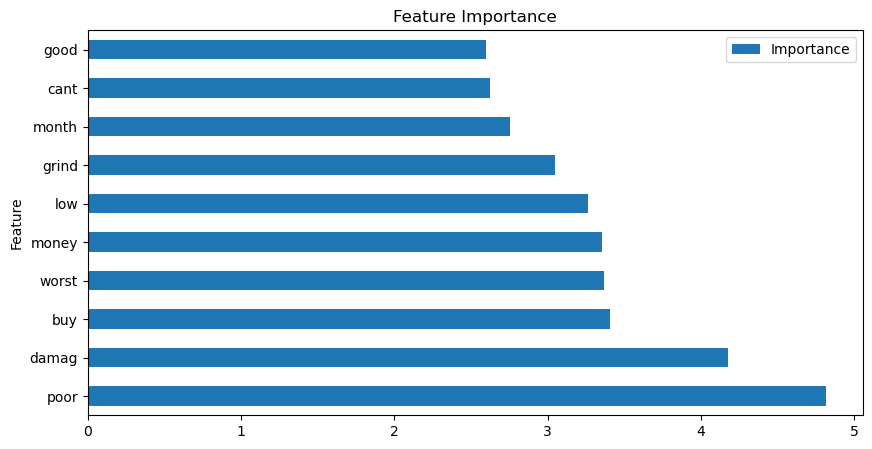

In [27]:
# retraining the model
model = SVC(kernel='linear', **model1.best_params_).fit(X_train_res, y_train_res)

# computing the feature importance scores
feature_importances = model.coef_[0]

# creating a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': vectorizer.get_feature_names(), 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# printing the top 10 most important features
print(feature_importance_df.head(10))

# plotting the important features
feature_importance_df.head(10).plot(x='Feature', y = 'Importance', kind='barh', figsize = (10,5), title = "Feature Importance")
plt.show()

## Creating a wordcloud of the trending words in the data

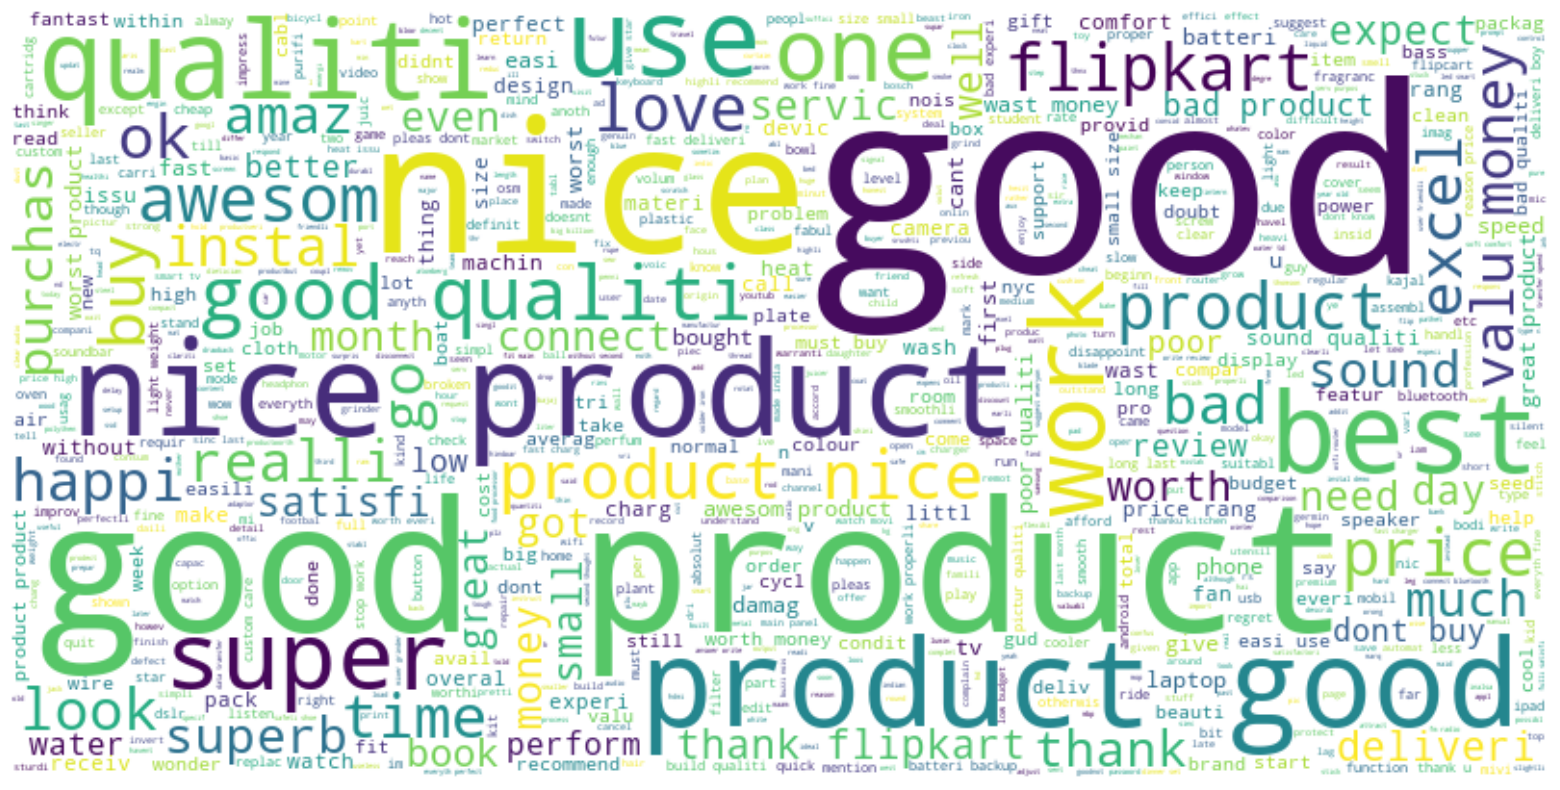

In [28]:
# getting the words in the text to use for the word cloud
titles = ' '.join(title for title in x_train[1:3000])

# creating a wordcloud
wordcloud = WordCloud(
    background_color='white', 
    max_words=1000,
    width=800, 
    height=400,
).generate(titles)

# plotting the wordcloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

A word cloud of the train data shows that a lot of positive reviews were made by customers. This is also inferred from the the Histogram plot of the data. 

_________________________________________________________________________________________________________________________

## Testing on the Test data Using the Support Vector Model

In this section the best model trained is used and evaluated on the trainset. The Accuracy, Precision, Recall, F1 Score and the Confusion Matrix are printed out for the evaluation of the model.

In [29]:
# defining the model with the best parameters
model = SVC(**model1.best_params_)
print('Suggested Trained Predcitive Model is: \n')

# train with Smote balanced data
model.fit(X_train_res, y_train_res)

Suggested Trained Predcitive Model is: 



SVC(cache_size=100, tol=0.1)

In [30]:
# predicting on the test data
pred = model.predict(x_test_vec)

# calculating and printing evaluation scores
print('\n Classification Report:')
print(classification_report(y_test, pred))
print("="*80)
gmean = geometric_mean_score(y_test, pred)
acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='macro')
prod = product_score(y_test, pred)
print('nGmean = {:.2f}    Accuracy = {:.2f}   f1 = {:.2f}    Product = {:.3f}'.format(gmean, acc, f1, prod))
print("="*80)


 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.46      0.61        50
           1       0.57      0.44      0.50        18
           2       0.90      0.98      0.94       327

    accuracy                           0.89       395
   macro avg       0.78      0.63      0.68       395
weighted avg       0.88      0.89      0.87       395

nGmean = 0.58    Accuracy = 0.89   f1 = 0.68    Product = 0.706


### Displaying the confusion matrix

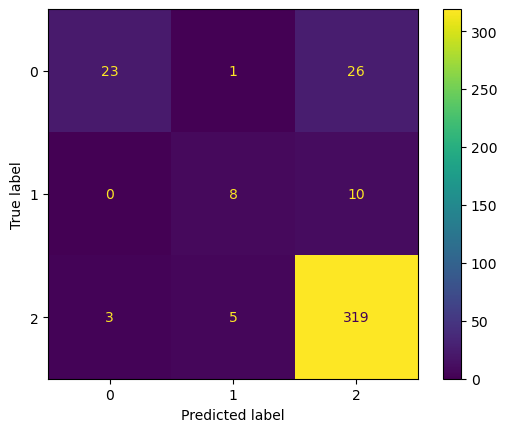

In [31]:
# creating a confusion matrix
conf_m = confusion_matrix(y_test, pred, labels = model.classes_)

# plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = conf_m, display_labels = model.classes_)
disp.plot()
plt.show()

The results from the testing showed a good product score (and accuracy). The confusion matrix also shows that the model predicts the various classes with quite good. The positive class review were the highest in number and were predicted with a hight accuracy.

_________________________________________________________________________________________________________________________

### FINAL DISCUSSION AND CONCLUSION

##### Limitation
Eventhough some data preprocessing was done, a thorough analysis of the text column will have to be performed to provide comprehensive steps to thoroughly clean the data.

##### Strengths
The model has a huge set of features to learn from, hence it will be able to predict well on new reviews.

##### Implications
The company can effectively predict the sentiment of the remarks and reviews made by customers in real time to constantly improve their service by implementing this model

##### Variance Bias Tradeoff
The model does not overfit on the training data and predicts well on the test data, hence there is a low effect of variance-bias tradeoff on the model.

_________________________________________________________________________________________________________________________